In [1]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
users = 100
p_login = 0.2
p_logout = 0.5
N=10000

In [72]:
def sim_states(users, p_login, p_logout, N):
    log_status=[0]*users
    states=np.zeros(users)
    state=0
    max_pis = [list() for i in range(5)]
    max_pis_ind = [26,27,28,29,30]
    for i in range(N):
        for j in range(users):
            u=random.random()
            if(log_status[j]==0):
                if(u<p_login):
                    state+=1
                    log_status[j]=1
            else:
                if(u<p_logout):
                    state-=1
                    log_status[j]=0
        for k in range(len(max_pis_ind)):
            max_pis[k].append(states[max_pis_ind[k]]/(i+1))
        states[state]+=1
    states = states/N
    return states, max_pis

In [73]:
states, max_pis = sim_states(users, p_login, p_logout, N)

In [74]:
print(states)
ind = np.argpartition(states, -5)[-5:]
print(ind)
print(states[ind])

[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.0003 0.     0.0006 0.0015 0.0017 0.0042 0.0081
 0.0142 0.0222 0.0314 0.042  0.0558 0.0683 0.0737 0.0829 0.0837 0.0831
 0.081  0.0788 0.0681 0.0538 0.0437 0.0326 0.0229 0.0183 0.011  0.0061
 0.0034 0.0027 0.0017 0.0012 0.0001 0.0003 0.0005 0.     0.0001 0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
[31 30 27 29 28]
[0.0788 0.081  0.0829 0.0831 0.0837]


Text(0, 0.5, 'PI')

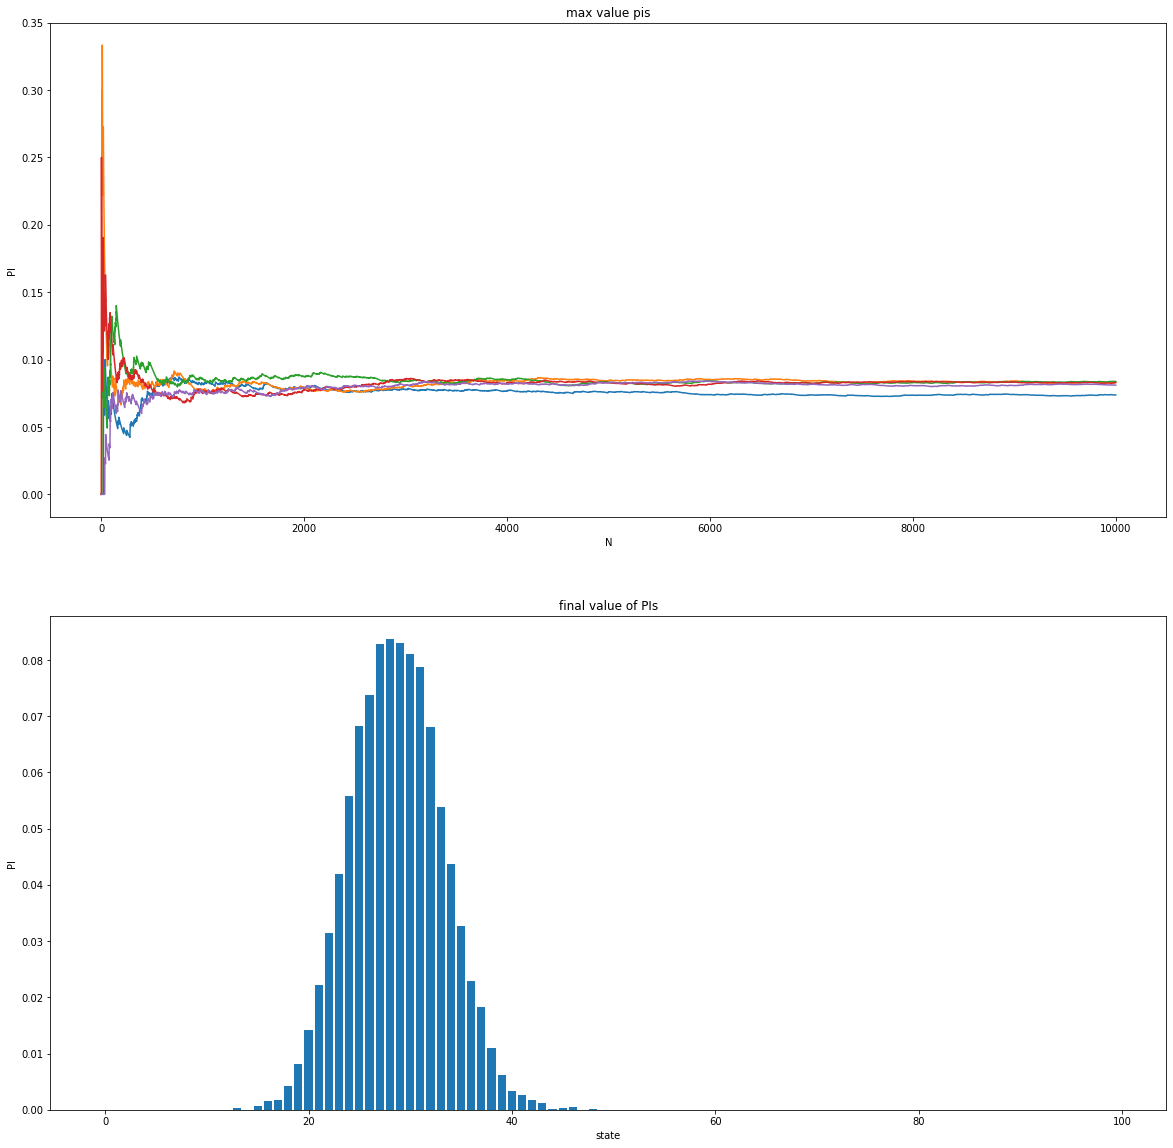

In [76]:
fig,ax = plt.subplots(2,figsize=(20,20))
for i in range(len(max_pis)):
    ax[0].plot(range(N),max_pis[i])
    ax[0].set_title('max value pis')
    ax[0].set_xlabel('N')
    ax[0].set_ylabel('PI')
    
ax[1].bar(range(users),states.tolist())
ax[1].set_title('final value of PIs')
ax[1].set_xlabel('state')
ax[1].set_ylabel('PI')